In [2]:
!pip install spekpy
#!pip install git+https://github.com/lynntf/nist-calculators.git
!pip install git+https://github.com/Zelenyy/nist-calculators.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 MB 8.5 MB/s eta 0:00:00
  Cloning https://github.com/Zelenyy/nist-calculators.git to /tmp/pip-req-build-rjfc7xmh
  Running command git clone --filter=blob:none --quiet https://github.com/Zelenyy/nist-calculators.git /tmp/pip-req-build-rjfc7xmh
  Resolved https://github.com/Zelenyy/nist-calculators.git to commit 9ef103806172590f87498a7d663e9925c39f9dc4
  Preparing metadata (setup.py) ... done
  Created wheel for nist-calculators: filename=nist_calculators-0.0.5-py3-none-any.whl size=1272342 sha256=5e7594a068a479060ef9ef72833dd4748159393299fb211a1412a4408808b3b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-tmaq8v8p/wheels/2a/c8/8b/b45c6a913d820a59ab8a93015b9a58138d939eab16fd4351de
Successfully built nist-calculators


In [3]:
import matplotlib.pyplot as plt
import numpy as np

import spekpy as sp

import xcom

In [ ]:
import requests
file_url = "https://github.com/lynntf/nist-calculators/blob/master/xcom/data/PeriodicTableofElements.csv"

r = requests.get(file_url, stream = True)

with open("/usr/local/lib/python3.10/dist-packages/xcom/data/PeriodicTableofElements.csv", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
         if block:
             file.write(block)


In [4]:
energy  =np.array([])
rg = np.array([])
mu = np.array([])

In [5]:
def Att():
  ## Roentgen
  s = sp.Spek(kvp=float(kvp),targ='W',th=39, dk = 0.5) # Create a spectrum
  s.filter('Cu',float(h_Cu)) # Thickness of material in mm
  s.filter('Al',float(h_Al)) # Thickness of material in mm
  k, f = s.get_spectrum(edges=True) # Get the spectrum
  global energy
  global rg
  global mu
  material = xcom.MaterialFactory.from_formula(mat_name)

  #data_water = xcom.calculate_attenuation(material)
  for i in range(len(k)-1):
      if k[i]!=k[i+1]:
          energy = np.append(energy,k[i]*1000)
          rg = np.append(rg, f[i])
          mu = np.append(mu,xcom.calculate_attenuation(material, [energy[-1]])['total'])
  rg = rg/sum(rg)
  mu = mu

  sh = 100*np.sum(rg*np.exp(-mu*D*float(rhob)/10))
  return (f'Level = {sh:.1f} %')




In [6]:
#@title Params {run: "auto"}
kvp = "140" #@param [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
h_Cu = "0.15" #@param [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
h_Al = "0.3" #@param [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
mat_name = 'CaCO3' #@param ['SiO2', 'CaCO3']
rhob = "2.3" #@param [1.9, 2.0, 2.1,2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,3.0]
D = 115 # @param {type:"number"}
print(Att())

FileNotFoundError: [Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/xcom/data/PeriodicTableofElements.csv'

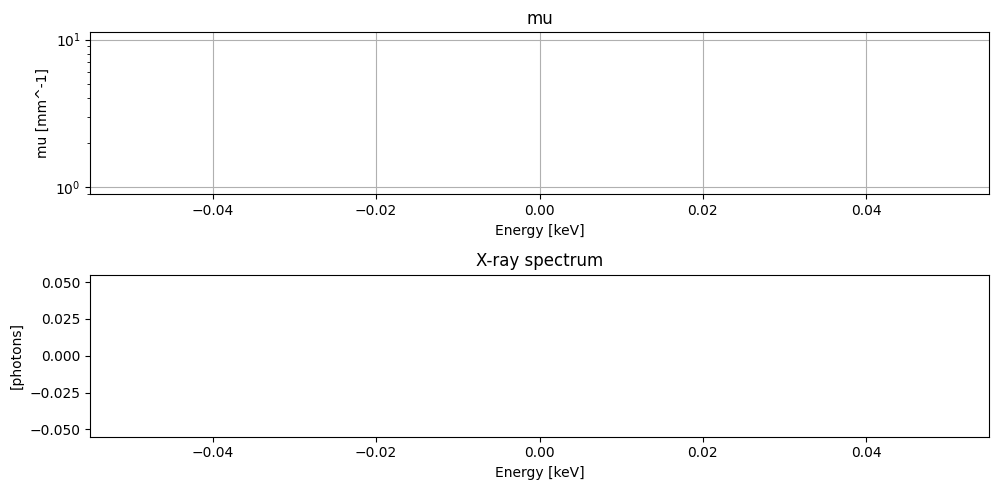

In [ ]:
# Plot the images
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

#plot mu
ax[0].semilogy(energy/1000,mu)
ax[0].grid(True)
ax[0].set_title("mu")
ax[0].set_xlabel('Energy [keV]')
ax[0].set_ylabel('mu [mm^-1]')

#PLot spectrum
ax[1].plot(energy/1000, rg)
ax[1].set_xlabel('Energy [keV]')
ax[1].set_ylabel('[photons]')
ax[1].set_title('X-ray spectrum')

fig.tight_layout()

